# Notebook for texture synthesis for MNIST

In [1]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt


# Define the transform to convert the images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to PyTorch tensor
])

# Load the MNIST dataset
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)


DATASET_IMAGES = 60000
TESTSET_IMAGES = 100
# DataLoader
train_loader = DataLoader(mnist_train, batch_size=DATASET_IMAGES, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=TESTSET_IMAGES, shuffle=False)
 
# Move the data to the specified device (GPU 0)
training_images, training_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))


### Define input args

In [2]:
import datetime
from synthesis_mnist import *

window_size=(28,28)         # Generated image size, (height,width)
kernel_size=7              # history window size
seed_size=7

num of selection pool 60001
num of selection pool 60002
num of selection pool 60001
num of selection pool 60004
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection pool 60002
num of selection pool 60001
num of selection pool 60001
num of selection pool 60003
num of selection pool 60001
num of selection pool 60001
num of selection pool 60002
num of selection pool 60001
num of selection pool 60003
num of selection pool 60002
num of selection pool 60001
num of selection pool 60001
num of selection pool 60002
num of selection pool 60003
num of selection pool 60001
num of selection pool 60002
num of selection pool 60002
num of selection pool 60001
num of selection pool 60001
num of selection pool 60004
num of selection pool 60002
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection pool 60001
num of selection poo

RuntimeError: number of categories cannot exceed 2^24

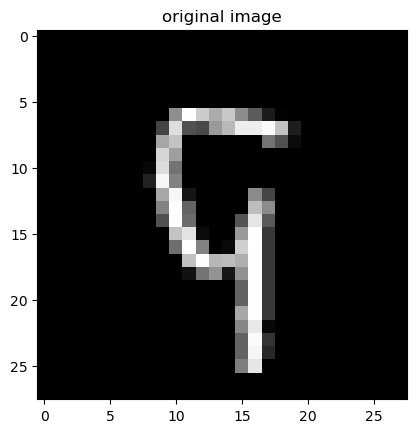

In [3]:
synthesized_texture = synthesize_texture(sample=training_images,
                                         test_sample=test_images,
                                         window_size=window_size, 
                                         kernel_size=kernel_size, 
                                         seed_size=seed_size)

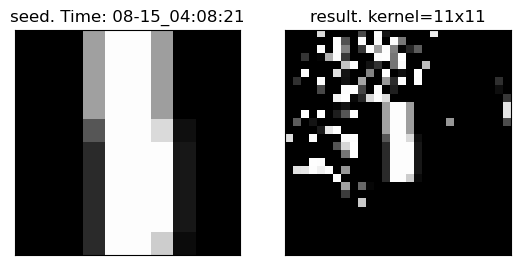

In [ ]:
current_time = datetime.datetime.now()
formatted_time = current_time.strftime("%m-%d_%H:%M:%S")  # Format: month-day hour:minute
out_path=f'outputs/mnist/{formatted_time}.png'

fig, [ax1, ax2] = plt.subplots(1,2)
ax2.imshow(synthesized_texture.to('cpu'), vmin=0, vmax=1, cmap='grey')
ax2.set(title=f'result. kernel={kernel_size}x{kernel_size}')
ax2.set_xticks([])
ax2.set_yticks([])

# Place seed in center of window

ph, pw = (window_size[0] - seed_size + 1) // 2, (window_size[1] - seed_size + 1) // 2
original_seed = synthesized_texture[ph:ph+seed_size, pw:pw+seed_size]
ax1.imshow(original_seed.to('cpu'), vmin=0, vmax=1, cmap='grey')
ax1.set(title=f'seed. Time: {formatted_time}')
ax1.set_xticks([])
ax1.set_yticks([])
fig.savefig(out_path)


In [ ]:
import torch

# Create a 2D tensor (e.g., an image or matrix)
original_window = torch.arange(1, 10).view(3, 3)  # Creates a 3x3 matrix
print("Original window:")
print(original_window)

# Define the padding size
pad = 1

# Pad the tensor
padded_window = torch.nn.functional.pad(original_window, (pad, pad, pad, pad), mode='constant', value=0)
print("\nPadded window:")
print(padded_window)

# Crop the padding off
window = padded_window[pad:-pad, pad:-pad]
print("\nCropped back to original window:")
print(window)


Original window:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Padded window:
tensor([[0, 0, 0, 0, 0],
        [0, 1, 2, 3, 0],
        [0, 4, 5, 6, 0],
        [0, 7, 8, 9, 0],
        [0, 0, 0, 0, 0]])

Cropped back to original window:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
N = 100
weights = torch.ones(N) / N
selection1 = torch.randint(0, N, (1,))


selection2 = torch.multinomial(weights, 1).item()
